IMPORTING REQUIRED LIBRARIES

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from patsy import dmatrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
import io
import plotly as pl
import plotly_express as px
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
!pip install plotly_express

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
train = pd.read_csv("/content/top_insta_influencers_data.csv")

In [5]:
train.info()
train.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rank               200 non-null    int64 
 1   channel_info       200 non-null    object
 2   influence_score    200 non-null    int64 
 3   posts              200 non-null    object
 4   followers          200 non-null    object
 5   avg_likes          200 non-null    object
 6   60_day_eng_rate    200 non-null    object
 7   new_post_avg_like  200 non-null    object
 8   total_likes        200 non-null    object
 9   country            138 non-null    object
dtypes: int64(2), object(8)
memory usage: 15.8+ KB


Index(['rank', 'channel_info', 'influence_score', 'posts', 'followers',
       'avg_likes', '60_day_eng_rate', 'new_post_avg_like', 'total_likes',
       'country'],
      dtype='object')

In [6]:
train=train.set_index('rank')
train.head()

,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
rank,,,,,,,,,
1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


Transfer columns posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes object to float.

In [7]:
post=list(train['posts'])
post1=list()
for num in post:
  if 'k' in num:
    new_num=1000*float(num.replace('k',''))
    post1.append(new_num)
  else:
    post1.append(float(num))
train['posts']=post1

followers=list(train['followers'])
followers1=list()
for num in followers:
    if 'm' in num:
        new_num=1000000*float(num.replace('m',''))
        followers1.append(new_num)
    else:
        followers1.append(float(num))
train['followers']=followers1

avg_likes=list(train['avg_likes'])
avg_likes1=list()
for num in avg_likes:
    if 'm' in num:
        new_num=1000000*float(num.replace('m',''))
        avg_likes1.append(new_num)
    else:
        new_num=1000*float(num.replace('k',''))
        avg_likes1.append(new_num)
train['avg_likes']=avg_likes1

new_post_avg_like=list(train['new_post_avg_like'])  
new_post_avg_like1=list()
for num in new_post_avg_like:
    if 'm' in num:
        new_num=1000000*float(num.replace('m',''))
        new_post_avg_like1.append(new_num)    
    else:
       new_num=1000*float(num.replace('k',''))
       new_post_avg_like1.append(new_num)
train['new_post_avg_like']=new_post_avg_like1

total_likes=list(train['total_likes']) 
total_likes1=list()
for num in total_likes:
    if 'b' in num:
        new_num=1000000000*float(num.replace('b',''))
        total_likes1.append(new_num)
    else:
        new_num=1000000*float(num.replace('m',''))
        total_likes1.append(new_num)
train['total_likes']=total_likes1

day_eng_rate=list(train['60_day_eng_rate'])
day_eng_rate1=list()
for num in day_eng_rate:
    if '%' in num:
        new_num=float(num.replace('%',''))
        day_eng_rate1.append(new_num)
    else:
        new_num=float(num)
        day_eng_rate1.append(new_num)
train['60_day_eng_rate']=day_eng_rate1

In [8]:
train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   channel_info       200 non-null    object 
 1   influence_score    200 non-null    int64  
 2   posts              200 non-null    float64
 3   followers          200 non-null    float64
 4   avg_likes          200 non-null    float64
 5   60_day_eng_rate    199 non-null    float64
 6   new_post_avg_like  200 non-null    float64
 7   total_likes        200 non-null    float64
 8   country            138 non-null    object 
dtypes: float64(6), int64(1), object(2)
memory usage: 15.6+ KB


DATA UNDERSTANDING

In [9]:
train.describe()

,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes
count,200.000000,200.000000,2.000000e+02,2.000000e+02,199.000000,2.000000e+02,2.000000e+02
mean,81.820000,3499.850000,7.740950e+07,1.787104e+06,1.902010,1.208132e+06,3.658112e+09
std,8.878159,3475.828158,7.368727e+07,2.193359e+06,3.329719,1.858322e+06,5.561939e+09
min,22.000000,10.000000,3.280000e+07,6.510000e+04,0.010000,0.000000e+00,1.830000e+07
25%,80.000000,947.500000,4.000000e+07,5.044000e+05,0.410000,1.957500e+05,9.968500e+08
50%,84.000000,2100.000000,5.005000e+07,1.100000e+06,0.880000,5.321500e+05,2.000000e+09
75%,86.000000,5025.000000,6.890000e+07,2.100000e+06,2.035000,1.325000e+06,3.900000e+09
max,93.000000,17500.000000,4.758000e+08,1.540000e+07,26.410000,1.260000e+07,5.740000e+10


Features

0.rank-rank of the influencer

1.channel info-username of the user

2.influence score-influence score of the users

3.posts-number of posts they have done so far

4.followers-number of followers of the user

5.avg_likes-average likes per post

6.60_day_eng_rat-in the 60 days,engagement rate

7.new_post_avg_like-the average likes for the new post

8.total likes-total likes the user has got on their posts.(in Billion)

9.country-country of origin of the user

In [10]:
px.box(train,x="60_day_eng_rate",y="total_likes")
px.box(train,x="60_day_eng_rate",y="total_likes")
px.scatter(train,x="followers",y="total_likes",marginal_x="box",marginal_y="violin",trendline="ols")


Distribution of countries

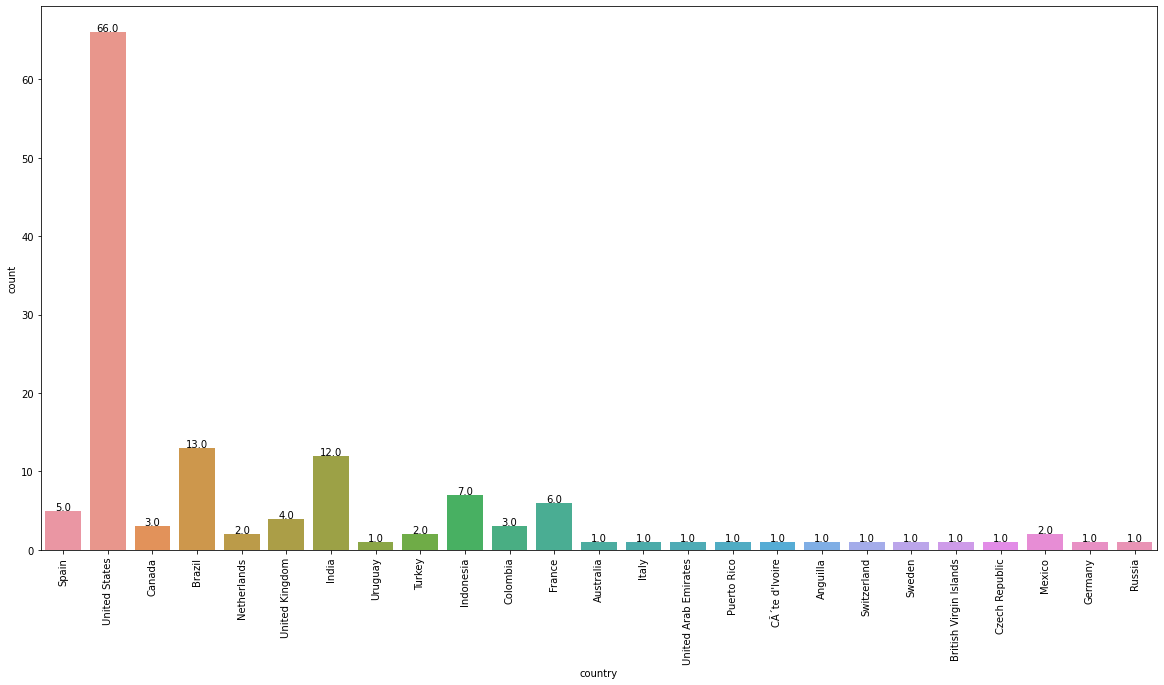

In [11]:
fig, ax1 = plt.subplots(figsize=(20,10))
graph = sns.countplot(ax=ax1,x = 'country' , data = train)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

Distribution of number features

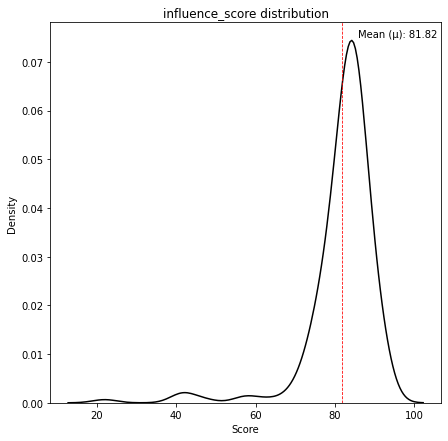

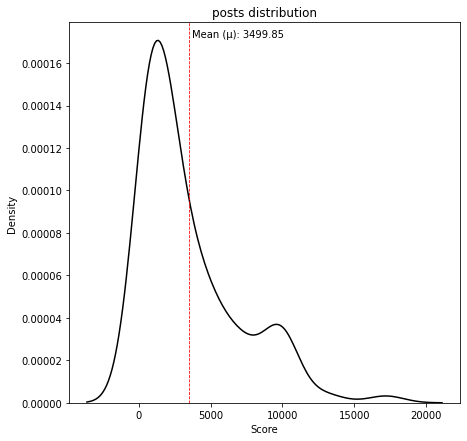

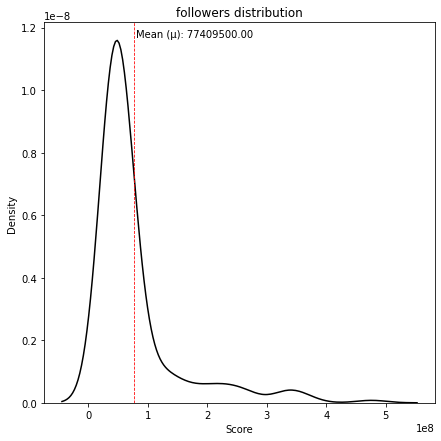

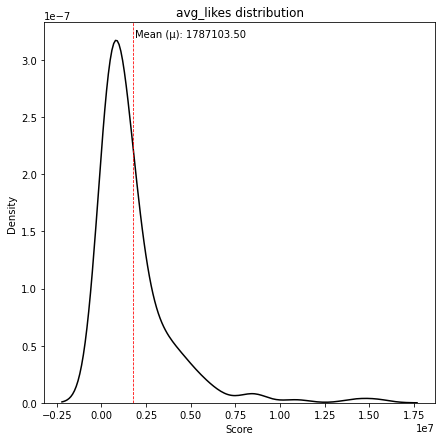

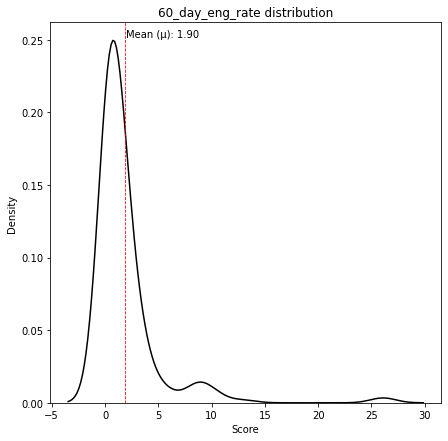

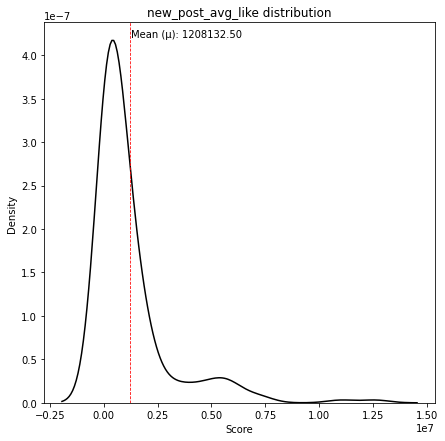

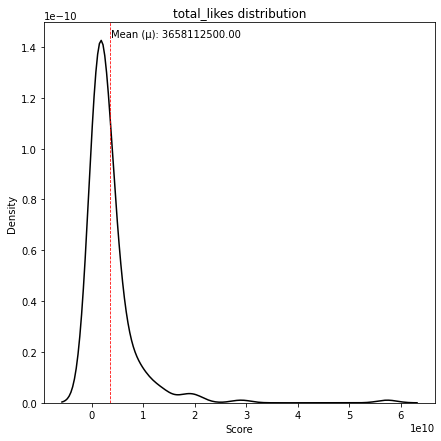

In [12]:
num_features=['influence_score','posts','followers', 'avg_likes', '60_day_eng_rate', 'new_post_avg_like','total_likes']
for column_name in num_features:
  plt.figure(figsize=(7, 7))
  plt.title("{column_name} distribution".format(column_name = column_name))
  #sns.histplot(train[column_name], stat='density', color='#E6E6FA')
  sns.kdeplot(train[column_name], color='black')
  plt.axvline(train[column_name].mean(), color='red', linestyle='--', linewidth=0.8)
  min_ylim, max_ylim = plt.ylim()
  plt.text(train[column_name].mean()*1.05, max_ylim*0.96, 'Mean (μ): {:.2f}'.format(train[column_name].mean()))
  plt.xlabel("Score")
  plt.ylabel("Density")
  plt.show()

The top 10 bloggers by various parameters.

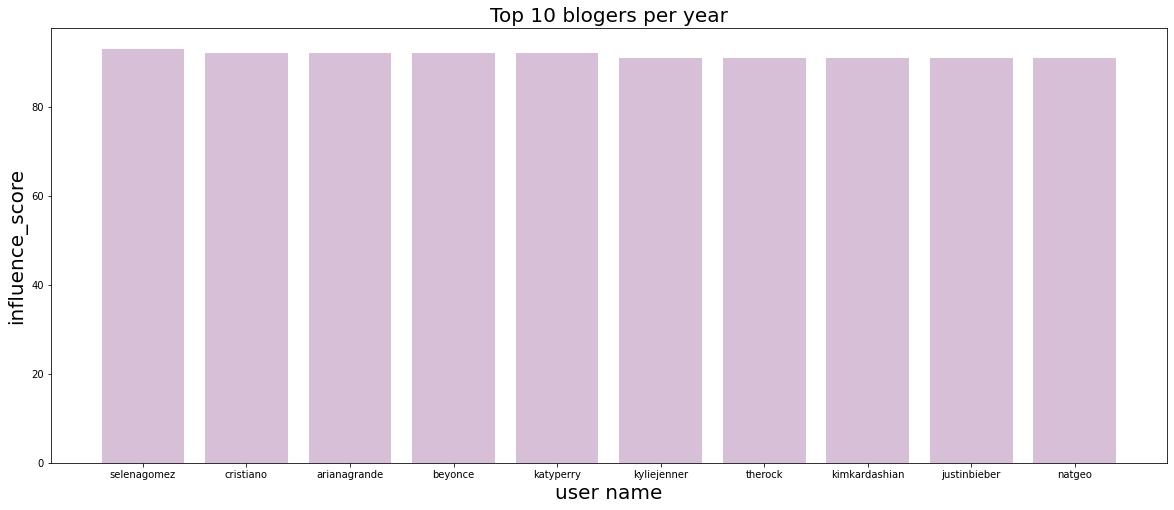

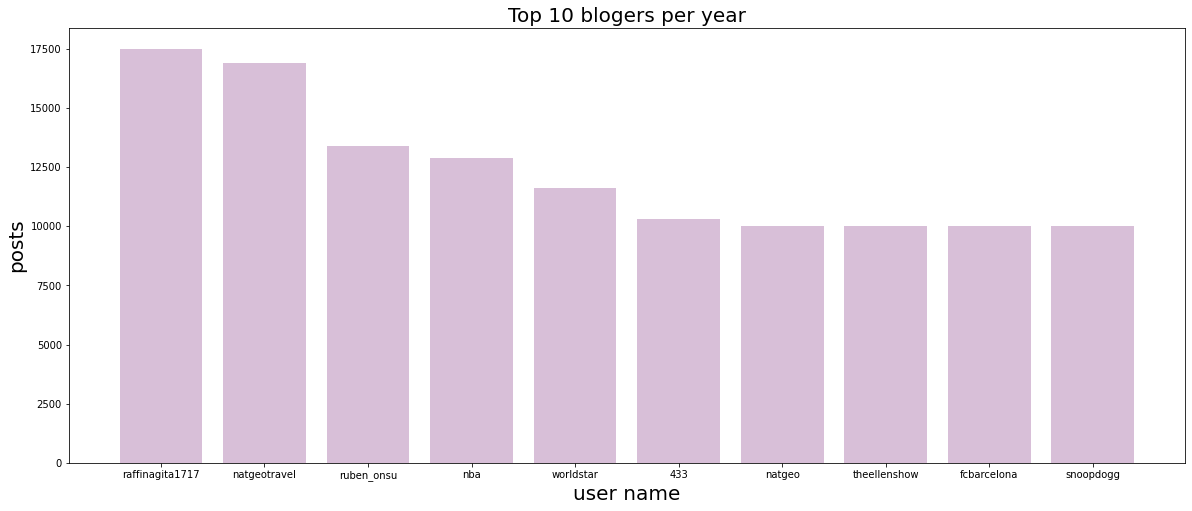

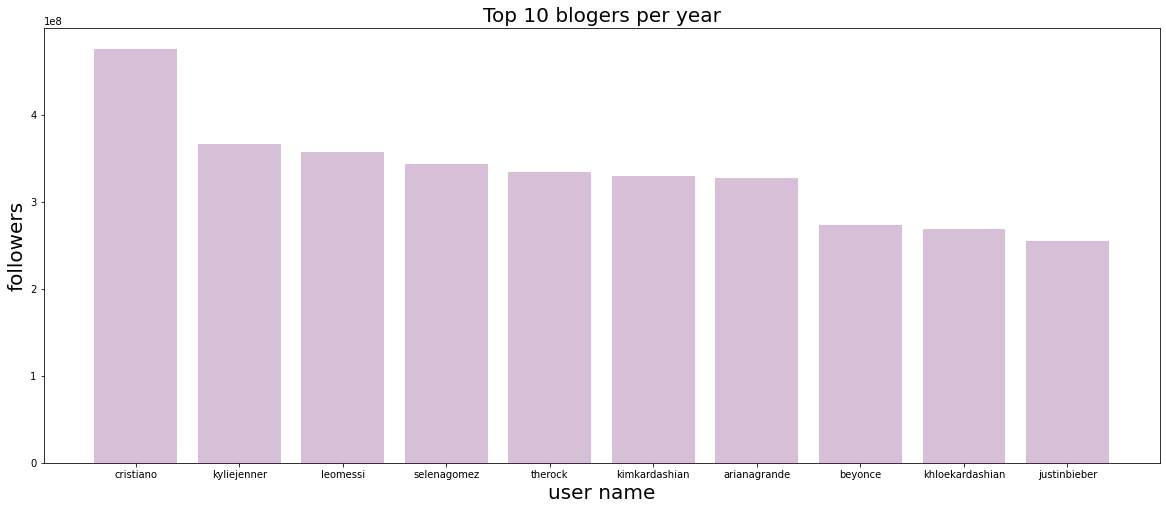

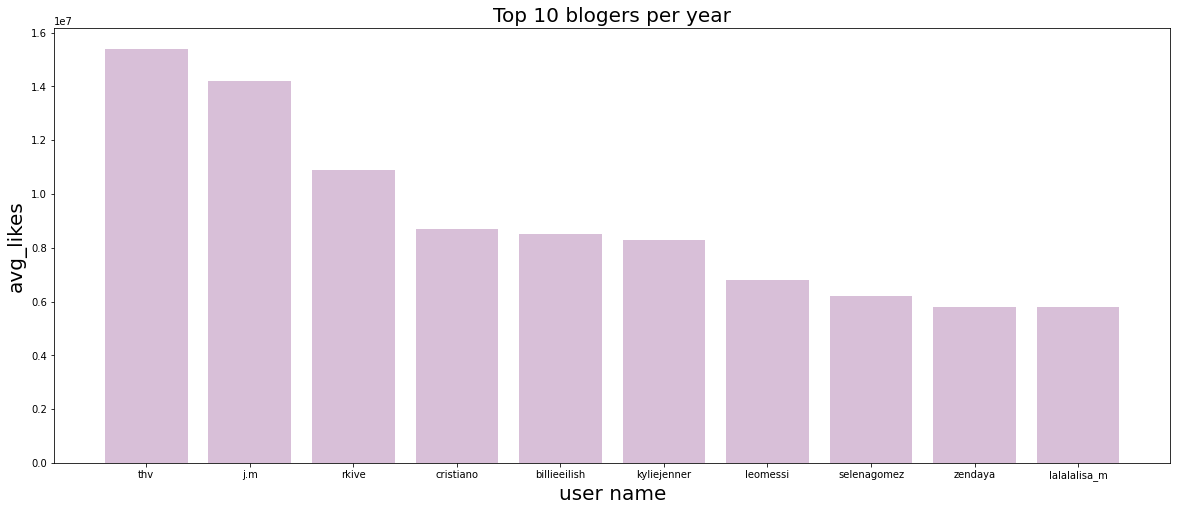

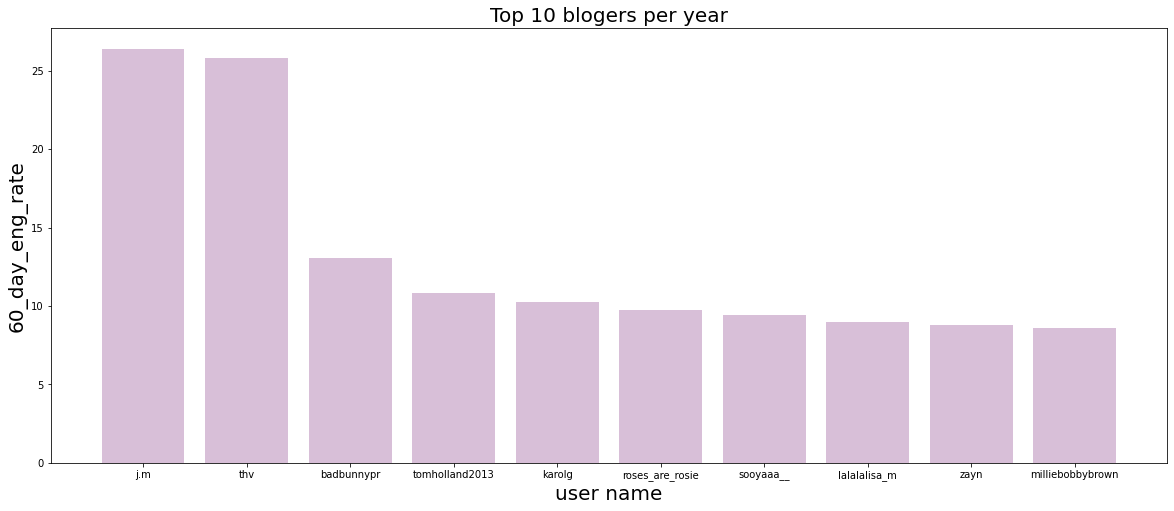

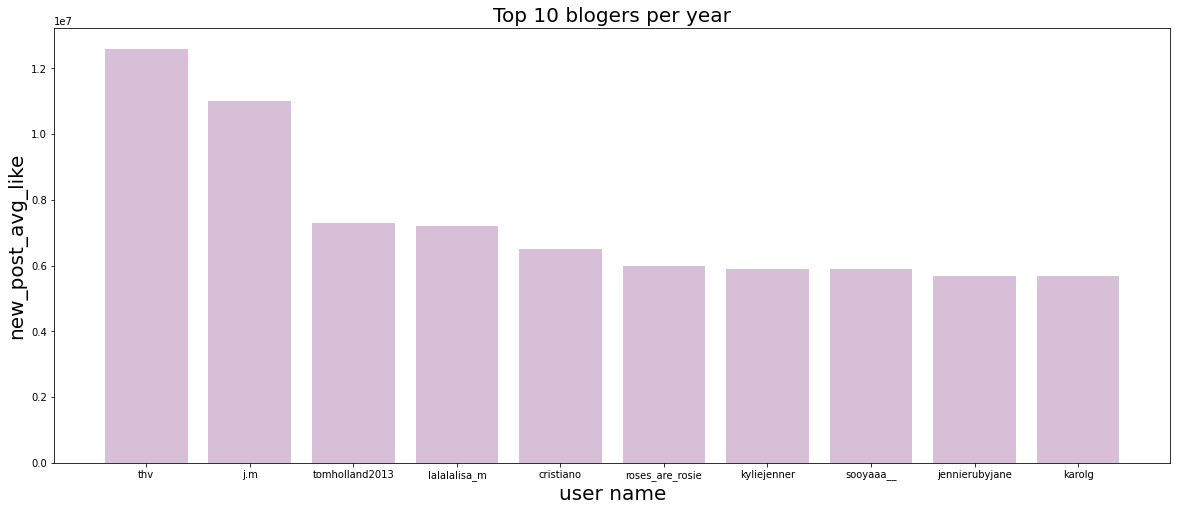

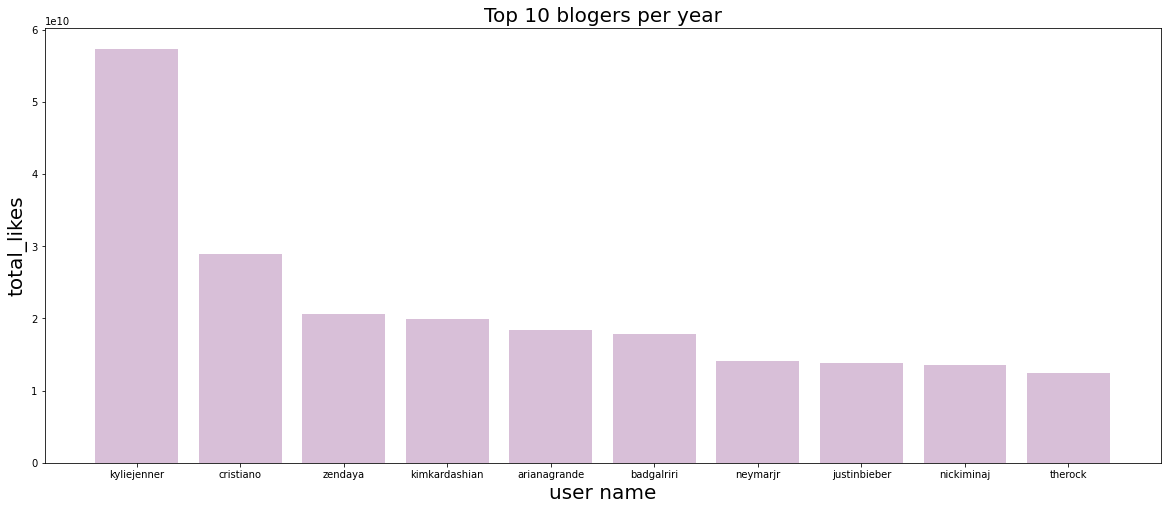

In [13]:
for column in num_features:
  top10 = train.nlargest(10,column)
  plt.figure(figsize=(20,8))
  plt.bar(top10['channel_info'], top10[column],color='#D8BFD8')
  plt.ylabel(column, fontsize = 20)
  plt.xlabel("user name", fontsize = 20)
  plt.title("Top 10 blogers per year", fontsize = 20)

The relationship between the various features.

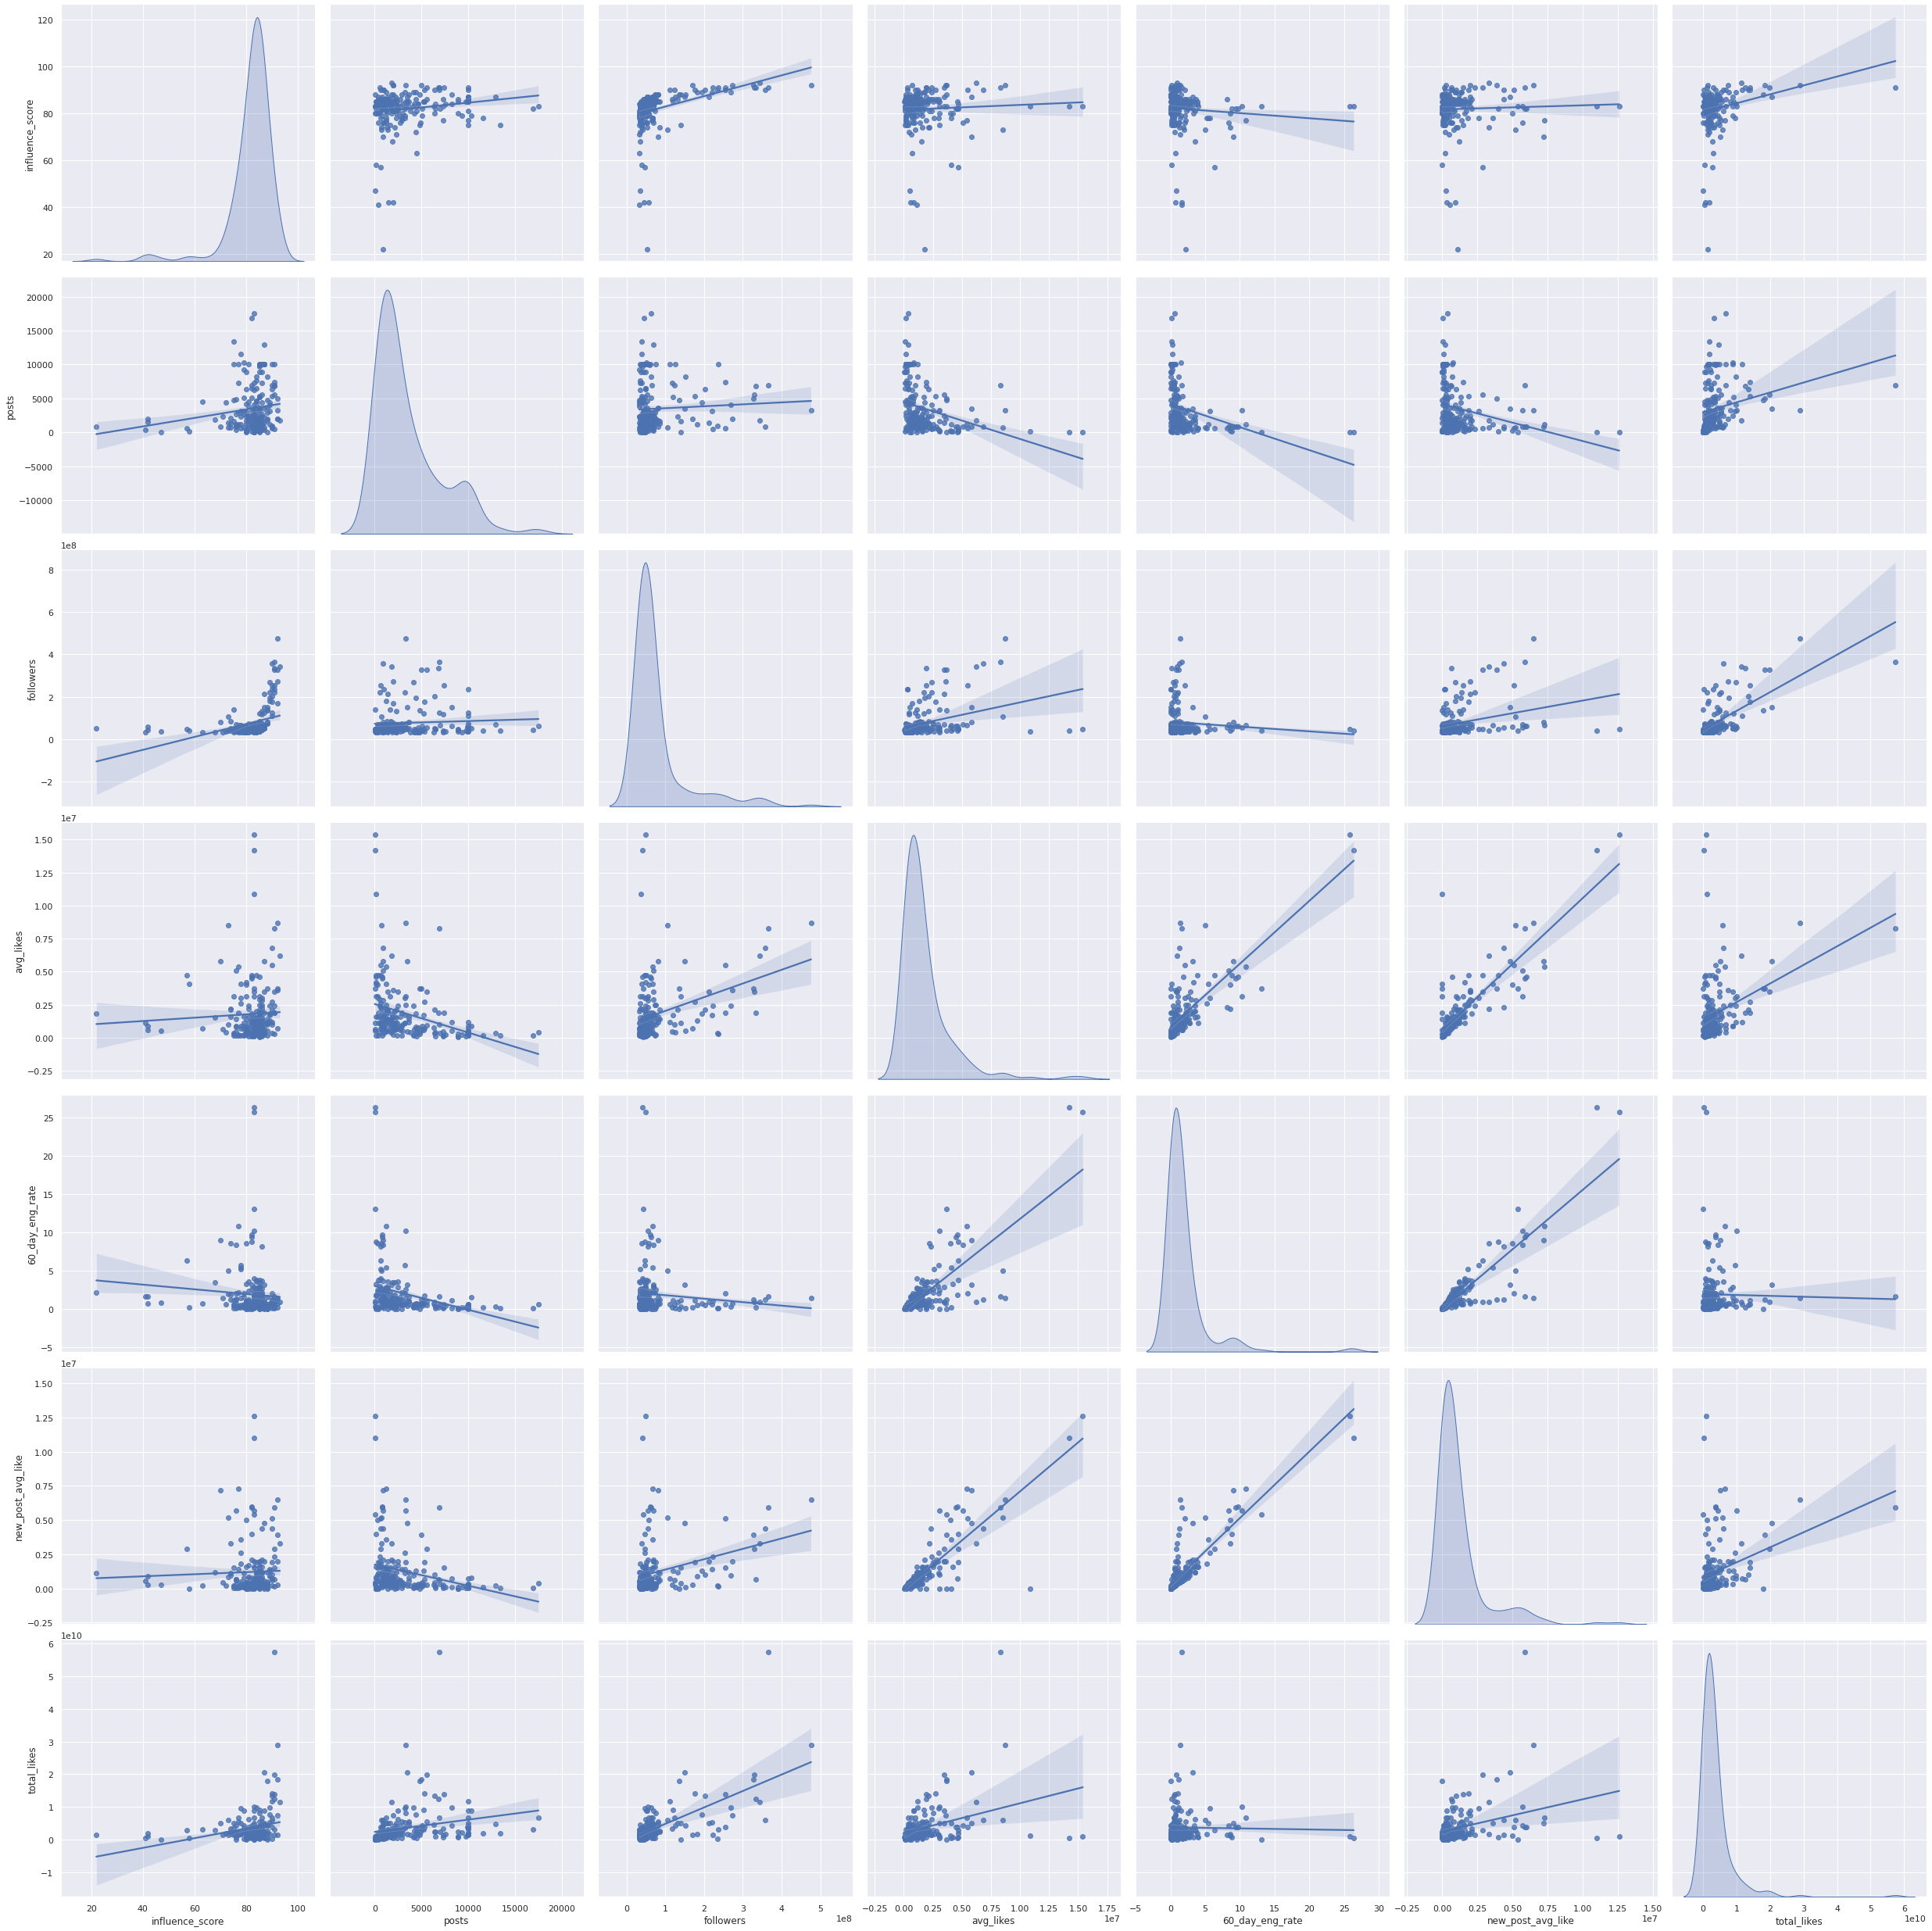

In [14]:
sns.set()
sns.pairplot(train[num_features],height=5,kind='reg',diag_kind='kde')
plt.show()

Statiscal tests

In [15]:
num_col=['influence_score','followers', 'total_likes','posts']
# Shapiro-Wilk Test
from scipy.stats import shapiro
# normality test
for feature in num_col:
    stat, p = shapiro(train[feature])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Statistics=0.674, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.588, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.517, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.832, p=0.000
Sample does not look Gaussian (reject H0)


In [16]:
correlation = train.corr()
print(correlation['total_likes'].sort_values(ascending = False),'\n')

total_likes          1.000000
followers            0.667539
avg_likes            0.357940
new_post_avg_like    0.329326
influence_score      0.237675
posts                0.233328
60_day_eng_rate     -0.019524
Name: total_likes, dtype: float64 



Index(['total_likes', 'followers', 'avg_likes', 'new_post_avg_like',
       'influence_score', 'posts', '60_day_eng_rate'],
      dtype='object')


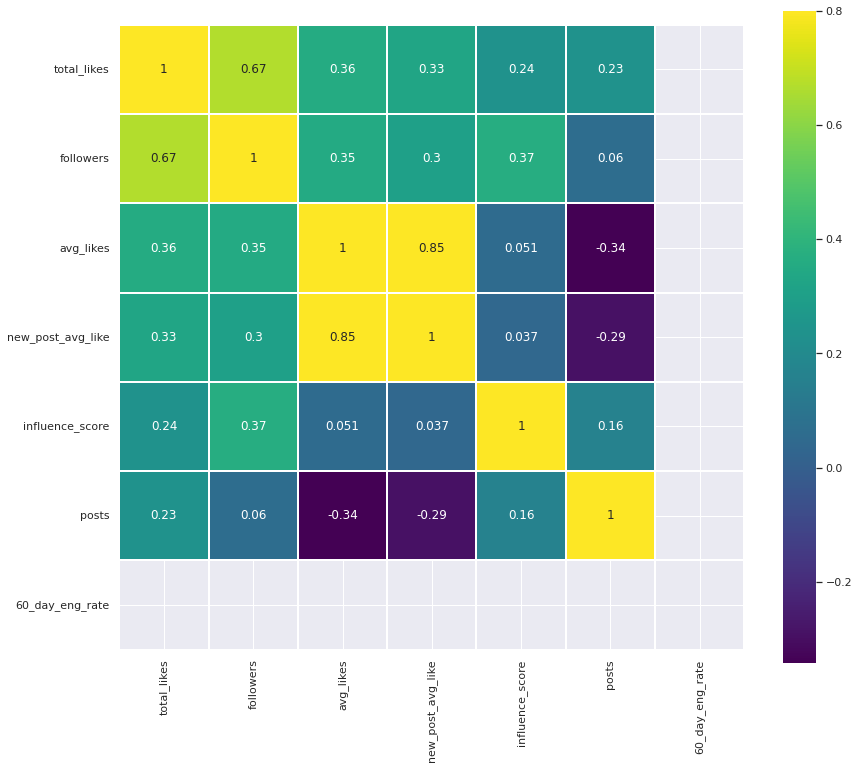

In [17]:
k= 10
cols = correlation.nlargest(k,'total_likes')['total_likes'].index
print(cols)
cm = np.corrcoef(train[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)
plt.show()

Machine learning predictions and validations

In [18]:
train

,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
rank,,,,,,,,,
1,cristiano,92,3300.0,475800000.0,8700000.0,1.39,6500000.0,2.900000e+10,Spain
2,kyliejenner,91,6900.0,366200000.0,8300000.0,1.62,5900000.0,5.740000e+10,United States
3,leomessi,90,890.0,357300000.0,6800000.0,1.24,4400000.0,6.000000e+09,NaN
4,selenagomez,93,1800.0,342700000.0,6200000.0,0.97,3300000.0,1.150000e+10,United States
5,therock,91,6800.0,334100000.0,1900000.0,0.20,665300.0,1.250000e+10,United States
...,...,...,...,...,...,...,...,...,...
196,iambeckyg,71,2300.0,33200000.0,623800.0,1.40,464700.0,1.400000e+09,United States
197,nancyajram,81,3800.0,33200000.0,390400.0,0.64,208000.0,1.500000e+09,France
198,luansantana,79,770.0,33200000.0,193300.0,0.26,82600.0,1.492000e+08,Brazil


In [19]:
train_df=train[0:150]
test_df=train[150:200]

In [20]:
train_df.head(3)


,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
rank,,,,,,,,,
1,cristiano,92,3300.0,475800000.0,8700000.0,1.39,6500000.0,2.900000e+10,Spain
2,kyliejenner,91,6900.0,366200000.0,8300000.0,1.62,5900000.0,5.740000e+10,United States
3,leomessi,90,890.0,357300000.0,6800000.0,1.24,4400000.0,6.000000e+09,NaN


In [21]:
test_df.head(3)


,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
rank,,,,,,,,,
151,princessyahrini,81,4500.0,40000000.0,118300.0,0.22,87400.0,5.299000e+08,Indonesia
152,liverpoolfc,75,10000.0,39900000.0,346700.0,0.42,162900.0,3.500000e+09,United Kingdom
153,teddysphotos,80,2300.0,39900000.0,715500.0,0.46,181100.0,1.700000e+09,United States


we need to select the prediction target and features. Prediction target is "total_likes" as y,features are"influence_score","posts","followers","60_day_eng_rate","new_post_avg_like" as x.

In [22]:
features=["influence_score","posts","followers","new_post_avg_like" ]
x_train=train_df[features]
x_test=test_df[features]
y_train=train_df.total_likes
y_test=test_df.total_likes

Decision Tree Regressor

In [23]:
influencer1_model=DecisionTreeRegressor(random_state=1)
influencer1_model.fit(x_train, y_train)
print("Making predictions for the following 5 influencers:")
print(x_test.head())
print("The predictions are")
print(influencer1_model.predict(x_test.head()))

Making predictions for the following 5 influencers:
      influence_score    posts   followers  new_post_avg_like
rank                                                         
151                81   4500.0  40000000.0            87400.0
152                75  10000.0  39900000.0           162900.0
153                80   2300.0  39900000.0           181100.0
154                78  11600.0  39200000.0            84400.0
155                84   1200.0  39200000.0           227700.0
The predictions are
[1.00e+09 3.80e+09 1.70e+09 1.50e+09 7.84e+08]


In [24]:
y_test.head(5)
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 151 to 200
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   influence_score    50 non-null     int64  
 1   posts              50 non-null     float64
 2   followers          50 non-null     float64
 3   new_post_avg_like  50 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 2.0 KB


In [25]:
influencer1_model_prediction=influencer1_model.predict(x_test)
influencer1_model_prediction

array([1.000e+09, 3.800e+09, 1.700e+09, 1.500e+09, 7.840e+08, 4.520e+08,
       2.800e+09, 1.800e+09, 1.600e+09, 1.500e+09, 7.107e+08, 4.235e+08,
       9.800e+09, 7.107e+08, 2.900e+09, 5.807e+08, 7.840e+08, 4.520e+08,
       7.107e+08, 7.107e+08, 1.600e+09, 7.670e+08, 1.500e+09, 7.670e+08,
       3.681e+08, 7.670e+08, 1.800e+09, 2.800e+09, 7.107e+08, 7.107e+08,
       1.600e+09, 2.400e+09, 8.630e+08, 7.107e+08, 1.500e+09, 3.500e+09,
       4.520e+08, 4.520e+08, 2.400e+09, 3.500e+09, 1.000e+09, 3.000e+09,
       1.600e+09, 7.107e+08, 1.600e+09, 1.800e+09, 1.600e+09, 7.107e+08,
       1.800e+09, 1.000e+09])

In [26]:
DecisionTreeRegressor_MAE=mean_absolute_error(y_test, influencer1_model_prediction)
print("The desicion tree regressor MAE is:")
print(DecisionTreeRegressor_MAE)

The desicion tree regressor MAE is:
675290000.0


Random Forest Regressor

In [27]:
influencer2_model=RandomForestRegressor(random_state=1)
influencer2_model.fit(x_train, y_train)
influencer2_model_prediction = influencer2_model.predict(x_test)
print("Random Forest Regressor MAE is:")
print(mean_absolute_error(y_test, influencer2_model_prediction))

Random Forest Regressor MAE is:
676570280.0


In [28]:
print("Making predictions for the following 5 influencers:")
print(x_test.head())
print("The predictions are")
print(influencer2_model.predict(x_test.head()))

Making predictions for the following 5 influencers:
      influence_score    posts   followers  new_post_avg_like
rank                                                         
151                81   4500.0  40000000.0            87400.0
152                75  10000.0  39900000.0           162900.0
153                80   2300.0  39900000.0           181100.0
154                78  11600.0  39200000.0            84400.0
155                84   1200.0  39200000.0           227700.0
The predictions are
[1.948633e+09 3.001415e+09 1.403513e+09 2.295820e+09 9.218200e+08]


In [29]:
influencer2_model_prediction=influencer1_model.predict(x_test)
influencer2_model_prediction

array([1.000e+09, 3.800e+09, 1.700e+09, 1.500e+09, 7.840e+08, 4.520e+08,
       2.800e+09, 1.800e+09, 1.600e+09, 1.500e+09, 7.107e+08, 4.235e+08,
       9.800e+09, 7.107e+08, 2.900e+09, 5.807e+08, 7.840e+08, 4.520e+08,
       7.107e+08, 7.107e+08, 1.600e+09, 7.670e+08, 1.500e+09, 7.670e+08,
       3.681e+08, 7.670e+08, 1.800e+09, 2.800e+09, 7.107e+08, 7.107e+08,
       1.600e+09, 2.400e+09, 8.630e+08, 7.107e+08, 1.500e+09, 3.500e+09,
       4.520e+08, 4.520e+08, 2.400e+09, 3.500e+09, 1.000e+09, 3.000e+09,
       1.600e+09, 7.107e+08, 1.600e+09, 1.800e+09, 1.600e+09, 7.107e+08,
       1.800e+09, 1.000e+09])

XGBRegressor

In [30]:
influencer3_model=XGBRegressor(n_estimators=500)
influencer3_model.fit(x_train, y_train)
influencer3_model_prediction = influencer3_model.predict(x_test)
print("XGBRegressor MAE is:")
print(mean_absolute_error(y_test, influencer3_model_prediction))

XGBRegressor MAE is:
525249457.92


In [31]:
influencer3_model_prediction=influencer1_model.predict(x_test)
influencer3_model_prediction

array([1.000e+09, 3.800e+09, 1.700e+09, 1.500e+09, 7.840e+08, 4.520e+08,
       2.800e+09, 1.800e+09, 1.600e+09, 1.500e+09, 7.107e+08, 4.235e+08,
       9.800e+09, 7.107e+08, 2.900e+09, 5.807e+08, 7.840e+08, 4.520e+08,
       7.107e+08, 7.107e+08, 1.600e+09, 7.670e+08, 1.500e+09, 7.670e+08,
       3.681e+08, 7.670e+08, 1.800e+09, 2.800e+09, 7.107e+08, 7.107e+08,
       1.600e+09, 2.400e+09, 8.630e+08, 7.107e+08, 1.500e+09, 3.500e+09,
       4.520e+08, 4.520e+08, 2.400e+09, 3.500e+09, 1.000e+09, 3.000e+09,
       1.600e+09, 7.107e+08, 1.600e+09, 1.800e+09, 1.600e+09, 7.107e+08,
       1.800e+09, 1.000e+09])